In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

In [5]:
data=pd.read_csv("ToyotaCorolla.csv",encoding='ISO-8859-1')
data.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [6]:
data1=data.iloc[:,[2,3,6,8,12,13,15,16,17]]
data1.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [7]:
#changing columns name of data set Age_08_04->Age & Quarterly_Tax->Tax by using rename 
data1.rename(columns={"Age_08_04":"Age","Quarterly_Tax":"Tax"},inplace=True)
data1.head()

C:\Users\Gajjala Jaipal Reddy\anaconda3\lib\site-packages\pandas\core\frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,Price,Age,KM,HP,cc,Doors,Gears,Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [8]:
#Describing the data1 by using describe function 
data1.describe()

,Price,Age,KM,HP,cc,Doors,Gears,Tax,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.000000,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,1576.85585,4.033426,5.026462,87.122563,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,424.38677,0.952677,0.188510,41.128611,52.64112
min,4350.000000,1.000000,1.000000,69.000000,1300.00000,2.000000,3.000000,19.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.00000,3.000000,5.000000,69.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,1600.00000,4.000000,5.000000,85.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,1600.00000,5.000000,5.000000,85.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,16000.00000,5.000000,6.000000,283.000000,1615.00000


In [9]:
#getting info of the data1
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Price   1436 non-null   int64
 1   Age     1436 non-null   int64
 2   KM      1436 non-null   int64
 3   HP      1436 non-null   int64
 4   cc      1436 non-null   int64
 5   Doors   1436 non-null   int64
 6   Gears   1436 non-null   int64
 7   Tax     1436 non-null   int64
 8   Weight  1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


In [10]:
#Checking Null values in data1
data1.isna().sum()

Price     0
Age       0
KM        0
HP        0
cc        0
Doors     0
Gears     0
Tax       0
Weight    0
dtype: int64

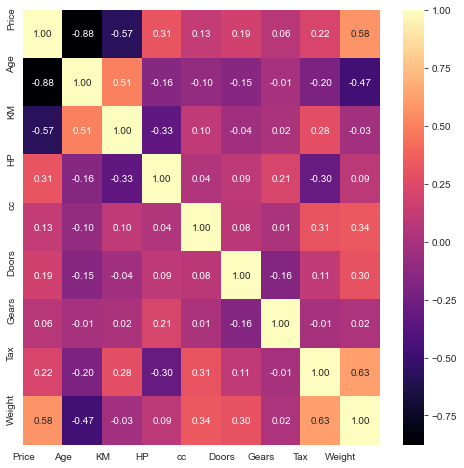

In [55]:
corr=data1.corr()
fig=plt.subplots(figsize=(8,8))
sns.heatmap(corr, cmap='magma',annot=True,fmt=".2f")
plt.xticks(range(len(corr.columns)),corr.columns)
plt.yticks(range(len(corr.columns)),corr.columns)
plt.show()

In [11]:
#correlation Matrix
data1.corr()

,Price,Age,KM,HP,cc,Doors,Gears,Tax,Weight
Price,1.000000,-0.876590,-0.569960,0.314990,0.126389,0.185326,0.063104,0.219197,0.581198
Age,-0.876590,1.000000,0.505672,-0.156622,-0.098084,-0.148359,-0.005364,-0.198431,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,0.102683,-0.036197,0.015023,0.278165,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.035856,0.092424,0.209477,-0.298432,0.089614
cc,0.126389,-0.098084,0.102683,0.035856,1.000000,0.079903,0.014629,0.306996,0.335637
Doors,0.185326,-0.148359,-0.036197,0.092424,0.079903,1.000000,-0.160141,0.109363,0.302618
Gears,0.063104,-0.005364,0.015023,0.209477,0.014629,-0.160141,1.000000,-0.005452,0.020613
Tax,0.219197,-0.198431,0.278165,-0.298432,0.306996,0.109363,-0.005452,1.000000,0.626134
Weight,0.581198,-0.470253,-0.028598,0.089614,0.335637,0.302618,0.020613,0.626134,1.000000


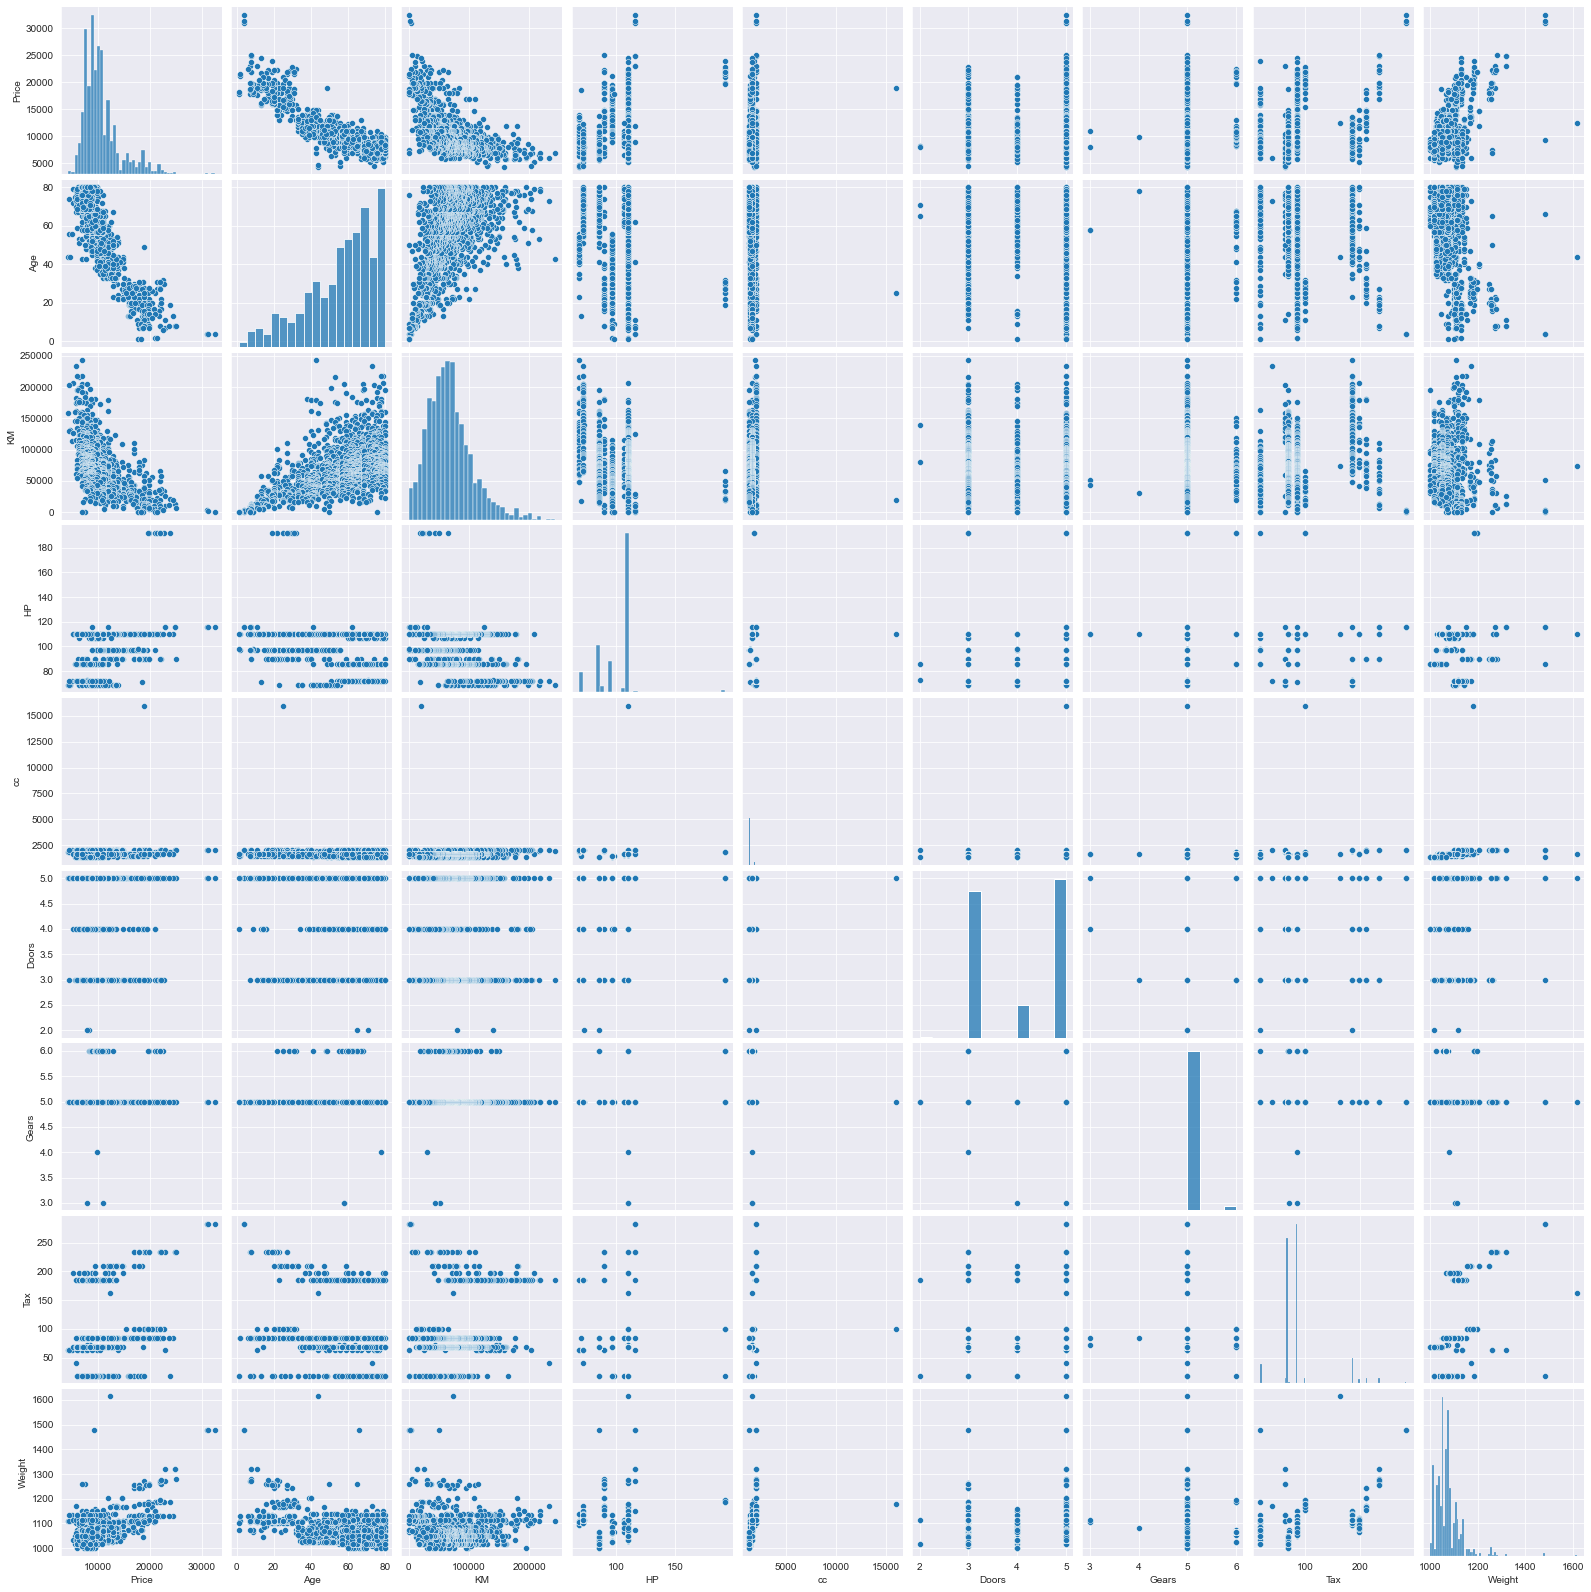

In [12]:
#plotting and pair plot between variables
sns.set_style(style='darkgrid')
sns.pairplot(data1)

{'whiskers': [<matplotlib.lines.Line2D at 0x1e6e49c5040>,
 'caps': [<matplotlib.lines.Line2D at 0x1e6e49c5700>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e6e49bcca0>],
 'medians': [<matplotlib.lines.Line2D at 0x1e6e49c5dc0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e6e49c9190>],
 'means': []}

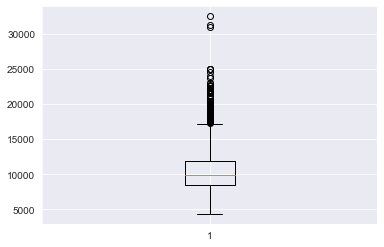

In [13]:
#visuvilizing varibles by using different graphical methods to understand about data
#by using BoxPlot we will get to know anout ouliers/noise of the data
plt.boxplot(data1["Price"])

{'whiskers': [<matplotlib.lines.Line2D at 0x1e6e3ffde80>,
 'caps': [<matplotlib.lines.Line2D at 0x1e6e4009580>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e6e3ffdb20>],
 'medians': [<matplotlib.lines.Line2D at 0x1e6e4009c10>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e6e4009f40>],
 'means': []}

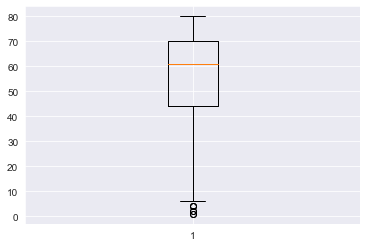

In [14]:
plt.boxplot(data1['Age'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1e6e4048700>,
 'caps': [<matplotlib.lines.Line2D at 0x1e6e4048dc0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e6e40483a0>],
 'medians': [<matplotlib.lines.Line2D at 0x1e6e4055490>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e6e40557c0>],
 'means': []}

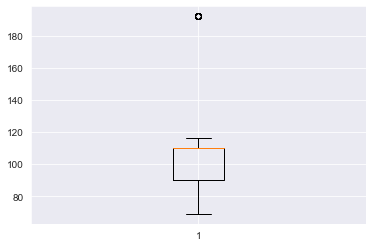

In [15]:
plt.boxplot(data1['HP'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1e6e343bfd0>,
 'caps': [<matplotlib.lines.Line2D at 0x1e6e3441fa0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e6e343b5e0>],
 'medians': [<matplotlib.lines.Line2D at 0x1e6e335c880>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e6e3450880>],
 'means': []}

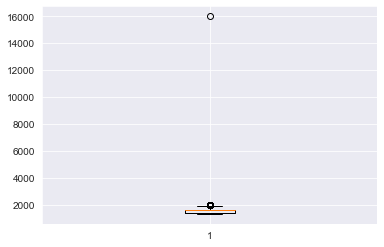

In [16]:
plt.boxplot(data1['cc'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1e6e34eba60>,
 'caps': [<matplotlib.lines.Line2D at 0x1e6e34f1580>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e6e34eb040>],
 'medians': [<matplotlib.lines.Line2D at 0x1e6e34f8490>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e6e1605d60>],
 'means': []}

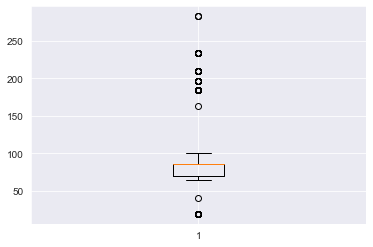

In [17]:
plt.boxplot(data1['Tax'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1e6e3158280>,
 'caps': [<matplotlib.lines.Line2D at 0x1e6e17136a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e6e3221490>],
 'medians': [<matplotlib.lines.Line2D at 0x1e6e3035370>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e6e2ef7d90>],
 'means': []}

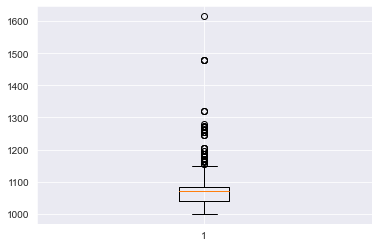

In [18]:
plt.boxplot(data1['Weight'])

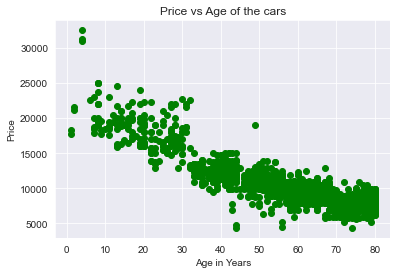

In [19]:
#Drawing scatter plot to get relation between price and Age of the cars
plt.scatter(data1['Age'],data1['Price'],c='green')
plt.title('Price vs Age of the cars')
plt.xlabel('Age in Years')
plt.ylabel('Price')
plt.show()

In [20]:
#Above scatter plot shows negative correlation between variables. we can understand that the price of the cars decreased when age of the cars increasing 


C:\Users\Gajjala Jaipal Reddy\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Cars Price Distribution Plot'}, xlabel='Price', ylabel='Density'>

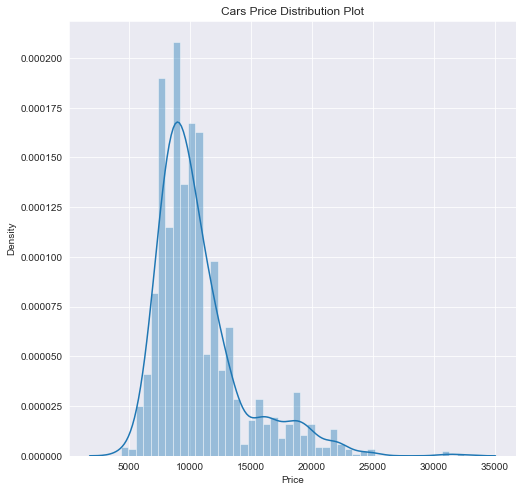

In [21]:
plt.figure(figsize=(8,8))
plt.title('Cars Price Distribution Plot')
sns.distplot(data1['Price'])

In [22]:
import statsmodels.api as sm

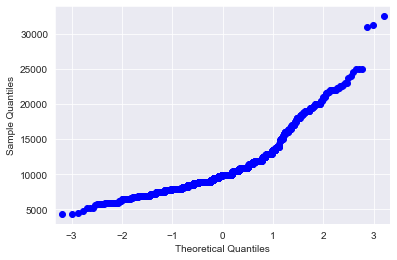

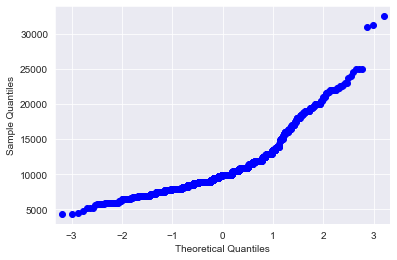

In [23]:
#normal QQ plot of Price
sm.graphics.qqplot(data1['Price'])

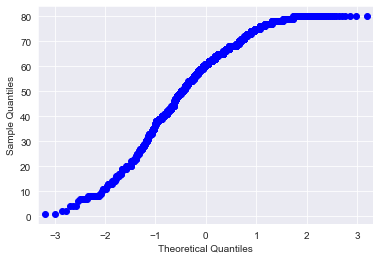

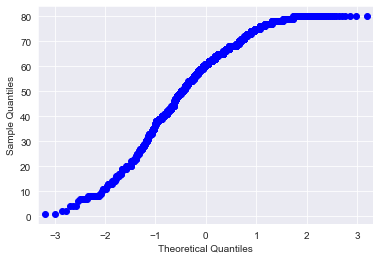

In [24]:
#normal QQ plot of Age
sm.graphics.qqplot(data1['Age'])

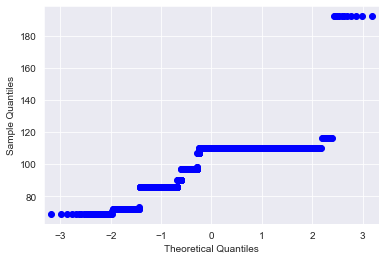

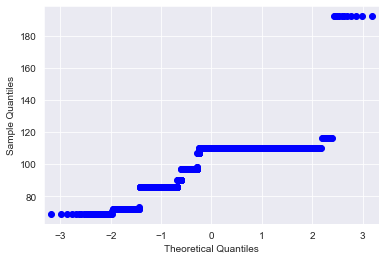

In [25]:
#normal QQ plot of Hp
sm.graphics.qqplot(data1['HP'])

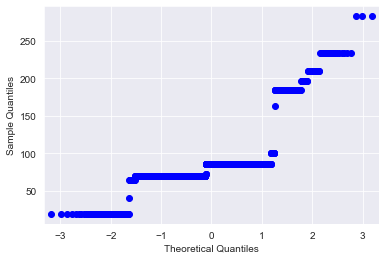

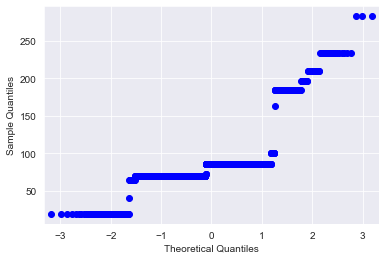

In [26]:
#normal QQ plot of Tax
sm.graphics.qqplot(data1['Tax'])

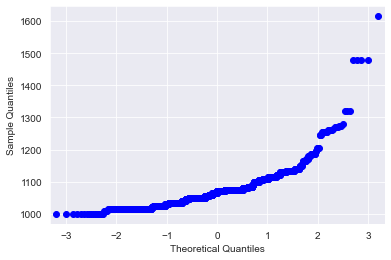

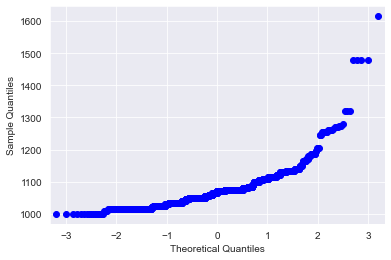

In [27]:
#normal QQ plot of Weight
sm.graphics.qqplot(data1['Weight'])

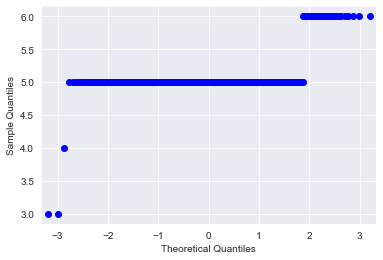

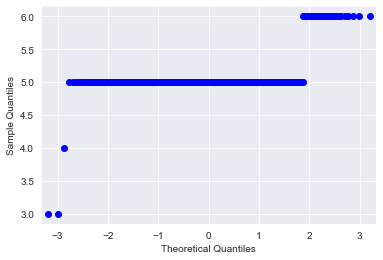

In [28]:
#normal QQ plot of Gears
sm.graphics.qqplot(data1['Gears'])

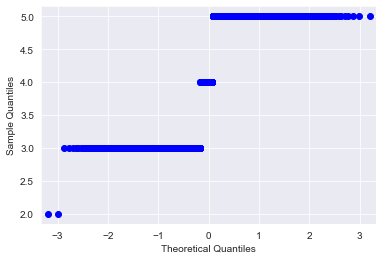

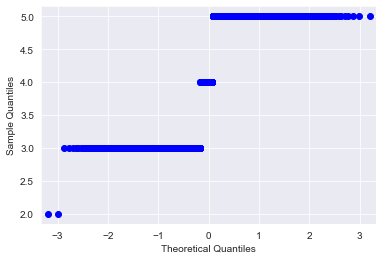

In [29]:
#normal QQ plot of Doors
sm.graphics.qqplot(data1['Doors'])

In [30]:
#Building a model
import statsmodels.formula.api as smf

m1=

In [31]:
model1=smf.ols("Price~Age+KM+HP+Tax+Weight+Gears+Doors+cc",data=data1).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1131.
Date:                Thu, 03 Feb 2022   Prob (F-statistic):               0.00
Time:                        19:08:03   Log-Likelihood:                -12376.
No. Observations:                1436   AIC:                         2.477e+04
Df Residuals:                    1427   BIC:                         2.482e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5573.1064   1411.390     -3.949      0.000   -8341.728   -2804.485
Age         -121.6584      2.616    -46.512      0.000    -126.789    -116.527
KM            -0.0208      0.001    -16.622      0.000      -0.023      -0.018
HP            31.6809      2.818     11.241      0.000      26.152      37.209
Tax            3.9491      1.310      3.015      0.003       1.379       6.519
Weight        16.9586      1.068     15.880      0.000      14.864      19.054
Gears        594.3199    197.055      3.016      0.003     207.771     980.869
Doors         -1.6166     40.006     -0.040      0.968     -80.093      76.859
cc            -0.1211      0.090     -1.344      0.179      -0.298       0.056
==============================================================================
Omnibus:                      151.719   Durbin-Watson:                   1.543
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1011.853
Skew:                          -0.219   Prob(JB):                    1.90e-220
Kurtosis:                       7.089   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [32]:
model1_cc=smf.ols("Price~cc",data=data1).fit()
model1_Door=smf.ols("Price~Doors",data=data1).fit()

In [33]:
model1_cc.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     23.28
Date:                Thu, 03 Feb 2022   Prob (F-statistic):           1.55e-06
Time:                        19:08:03   Log-Likelihood:                -13795.
No. Observations:                1436   AIC:                         2.759e+04
Df Residuals:                    1434   BIC:                         2.760e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   9027.5548    365.576     24.694      0.000    8310.435    9744.675
cc             1.0802      0.224      4.825      0.000       0.641       1.519
==============================================================================
Omnibus:                      465.181   Durbin-Watson:                   0.267
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1390.401
Skew:                           1.649   Prob(JB):                    1.20e-302
Kurtosis:                       6.516   Cond. No.                     6.29e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.29e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [34]:
model1_Door.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     51.00
Date:                Thu, 03 Feb 2022   Prob (F-statistic):           1.46e-12
Time:                        19:08:03   Log-Likelihood:                -13782.
No. Observations:                1436   AIC:                         2.757e+04
Df Residuals:                    1434   BIC:                         2.758e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7885.0058    409.438     19.258      0.000    7081.843    8688.168
Doors        705.5586     98.795      7.142      0.000     511.761     899.356
==============================================================================
Omnibus:                      466.779   Durbin-Watson:                   0.287
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1406.209
Skew:                           1.651   Prob(JB):                    4.42e-306
Kurtosis:                       6.549   Cond. No.                         19.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [35]:
model1_2=smf.ols("Price~cc+Doors",data=data1).fit()

In [36]:
model1_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.047
Model:                            OLS   Adj. R-squared:                  0.046
Method:                 Least Squares   F-statistic:                     35.24
Date:                Thu, 03 Feb 2022   Prob (F-statistic):           1.15e-15
Time:                        19:08:03   Log-Likelihood:                -13772.
No. Observations:                1436   AIC:                         2.755e+04
Df Residuals:                    1433   BIC:                         2.757e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   6509.4211    515.773     12.621      0.000    5497.670    7521.173
cc             0.9597      0.221      4.340      0.000       0.526       1.393
Doors        671.3973     98.501      6.816      0.000     478.176     864.619
==============================================================================
Omnibus:                      448.845   Durbin-Watson:                   0.290
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1294.854
Skew:                           1.603   Prob(JB):                    6.70e-282
Kurtosis:                       6.370   Cond. No.                     9.09e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [37]:
import statsmodels.api as sm

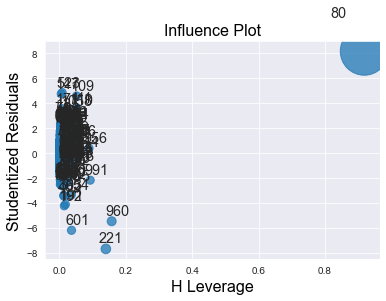

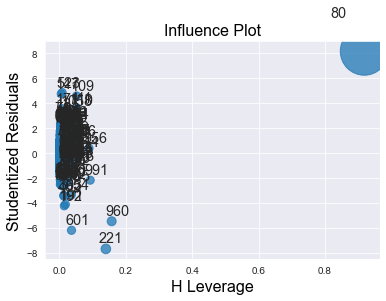

In [38]:
sm.graphics.influence_plot(model1)

In [39]:
data2=data1.drop(data.index[[80]],axis=0)

In [40]:
model2=smf.ols("Price~Age+KM+HP+cc+Doors+Gears+Tax+Weight",data=data2).fit()

In [41]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     1186.
Date:                Thu, 03 Feb 2022   Prob (F-statistic):               0.00
Time:                        19:08:09   Log-Likelihood:                -12335.
No. Observations:                1435   AIC:                         2.469e+04
Df Residuals:                    1426   BIC:                         2.473e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -6284.7401   1382.748     -4.545      0.000   -8997.180   -3572.301
Age         -120.4550      2.562    -47.021      0.000    -125.480    -115.430
KM            -0.0178      0.001    -13.973      0.000      -0.020      -0.015
HP            39.3463      2.911     13.516      0.000      33.636      45.057
cc            -2.5242      0.307     -8.216      0.000      -3.127      -1.922
Doors        -27.2285     39.241     -0.694      0.488    -104.206      49.749
Gears        523.9416    192.865      2.717      0.007     145.612     902.271
Tax            9.0440      1.425      6.348      0.000       6.249      11.839
Weight        20.1655      1.116     18.076      0.000      17.977      22.354
==============================================================================
Omnibus:                      246.945   Durbin-Watson:                   1.595
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2706.374
Skew:                          -0.443   Prob(JB):                         0.00
Kurtosis:                       9.669   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

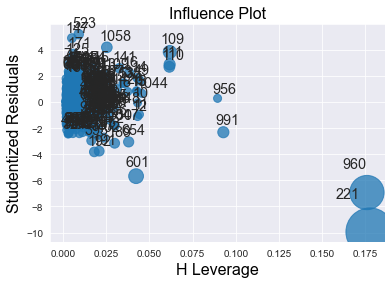

In [42]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model2)
plt.show()

In [43]:
data3=data1.drop(data.index[[960,221]],axis=0)

In [44]:
model3=smf.ols("Price~Age+KM+HP+Doors+Gears+Tax+Weight",data=data3).fit()

In [45]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     1399.
Date:                Thu, 03 Feb 2022   Prob (F-statistic):               0.00
Time:                        19:08:13   Log-Likelihood:                -12310.
No. Observations:                1434   AIC:                         2.464e+04
Df Residuals:                    1426   BIC:                         2.468e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.135e+04   1480.538     -7.665      0.000   -1.43e+04   -8443.634
Age         -115.9699      2.590    -44.770      0.000    -121.051    -110.889
KM            -0.0214      0.001    -17.743      0.000      -0.024      -0.019
HP            26.3840      2.762      9.551      0.000      20.965      31.803
Doors        -61.0147     39.145     -1.559      0.119    -137.802      15.772
Gears        582.6795    190.386      3.061      0.002     209.213     956.146
Tax           -1.0095      1.347     -0.749      0.454      -3.653       1.634
Weight        23.1043      1.199     19.263      0.000      20.751      25.457
==============================================================================
Omnibus:                      136.659   Durbin-Watson:                   1.622
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              762.187
Skew:                          -0.234   Prob(JB):                    3.11e-166
Kurtosis:                       6.541   Cond. No.                     3.39e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.39e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

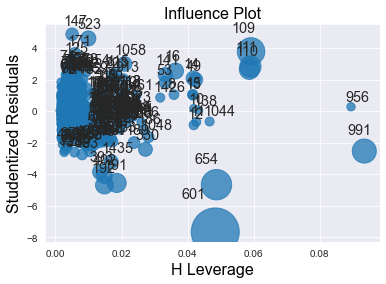

In [46]:
influence_plot(model3)
plt.show()

In [47]:
model4=smf.ols("Price~Age+KM+HP+cc+Doors+Gears+Tax+Weight",data=data3).fit()

In [48]:
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.873
Method:                 Least Squares   F-statistic:                     1230.
Date:                Thu, 03 Feb 2022   Prob (F-statistic):               0.00
Time:                        19:08:17   Log-Likelihood:                -12306.
No. Observations:                1434   AIC:                         2.463e+04
Df Residuals:                    1425   BIC:                         2.468e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -1.17e+04   1483.776     -7.883      0.000   -1.46e+04   -8785.632
Age         -115.7260      2.587    -44.735      0.000    -120.801    -110.651
KM            -0.0212      0.001    -17.565      0.000      -0.024      -0.019
HP            26.8918      2.764      9.729      0.000      21.470      32.314
cc            -0.2255      0.087     -2.579      0.010      -0.397      -0.054
Doors        -64.3772     39.089     -1.647      0.100    -141.055      12.301
Gears        574.9008    190.034      3.025      0.003     202.125     947.676
Tax           -0.7496      1.348     -0.556      0.578      -3.395       1.896
Weight        23.7149      1.220     19.435      0.000      21.321      26.109
==============================================================================
Omnibus:                      136.138   Durbin-Watson:                   1.629
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              772.123
Skew:                          -0.221   Prob(JB):                    2.17e-168
Kurtosis:                       6.567   Cond. No.                     3.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [49]:
finalmodel=smf.ols("Price~Age+KM+HP+cc+Doors+Gears+Tax+Weight",data=data3).fit()

In [50]:
finalmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.873
Method:                 Least Squares   F-statistic:                     1230.
Date:                Thu, 03 Feb 2022   Prob (F-statistic):               0.00
Time:                        19:08:17   Log-Likelihood:                -12306.
No. Observations:                1434   AIC:                         2.463e+04
Df Residuals:                    1425   BIC:                         2.468e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -1.17e+04   1483.776     -7.883      0.000   -1.46e+04   -8785.632
Age         -115.7260      2.587    -44.735      0.000    -120.801    -110.651
KM            -0.0212      0.001    -17.565      0.000      -0.024      -0.019
HP            26.8918      2.764      9.729      0.000      21.470      32.314
cc            -0.2255      0.087     -2.579      0.010      -0.397      -0.054
Doors        -64.3772     39.089     -1.647      0.100    -141.055      12.301
Gears        574.9008    190.034      3.025      0.003     202.125     947.676
Tax           -0.7496      1.348     -0.556      0.578      -3.395       1.896
Weight        23.7149      1.220     19.435      0.000      21.321      26.109
==============================================================================
Omnibus:                      136.138   Durbin-Watson:                   1.629
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              772.123
Skew:                          -0.221   Prob(JB):                    2.17e-168
Kurtosis:                       6.567   Cond. No.                     3.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [57]:
finalmodel_pred=finalmodel.predict(data3)
finalmodel_pred

0       16765.748753
1       16214.911467
2       16761.990156
3       16397.047465
4       16254.365149
            ...     
1431     8839.504999
1432     8287.951392
1433     8445.789904
1434     8563.638533
1435    11062.569049
Length: 1434, dtype: float64

Text(0, 0.5, 'Predicted Values')

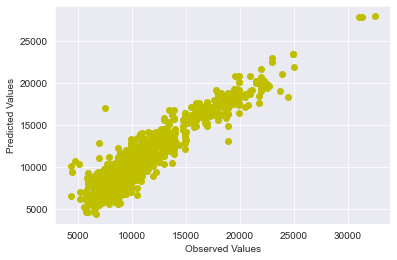

In [64]:
plt.scatter(data3['Price'],finalmodel_pred,c='y');
plt.xlabel("Observed Values");
plt.ylabel("Predicted Values")

Text(0, 0.5, 'Residuals')

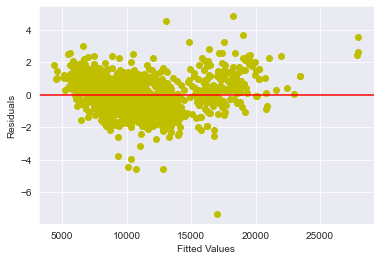

In [66]:
plt.scatter(finalmodel_pred,finalmodel.resid_pearson,c='y');
plt.axhline(y=0,color='red');
plt.xlabel("Fitted Values");
plt.ylabel("Residuals")

(array([  1.,   0.,   5.,   5., 107., 578., 594., 126.,  15.,   3.]),
 array([-7.33906157, -6.12306064, -4.90705971, -3.69105879, -2.47505786,
        -1.25905693, -0.04305601,  1.17294492,  2.38894585,  3.60494678,
         4.8209477 ]),
 <BarContainer object of 10 artists>)

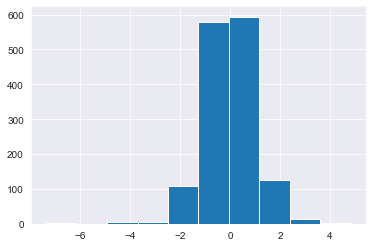

In [67]:
plt.hist(finalmodel.resid_pearson)

In [71]:
import pylab
import scipy.stats as st

((array([-3.30010144, -3.0425298 , -2.89926962, ...,  2.89926962,
          3.0425298 ,  3.30010144]),
  array([-7.33906157, -4.59862495, -4.54754265, ...,  3.64725293,
          4.55726435,  4.8209477 ])),
 (0.9840374285960037, 3.007624779063053e-12, 0.9851416994302372))

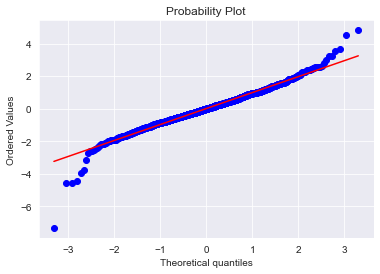

In [72]:
st.probplot(finalmodel.resid_pearson,dist='norm',plot=pylab)

In [74]:
from sklearn.model_selection import train_test_split


In [75]:
train_data,test_data=train_test_split(data1,test_size=0.3)

In [78]:
finalmodel1=smf.ols("Price~Age+KM+cc+Doors+Tax+Weight",data=train_data).fit()
finalmodel1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     937.7
Date:                Tue, 08 Feb 2022   Prob (F-statistic):               0.00
Time:                        11:36:09   Log-Likelihood:                -8723.7
No. Observations:                1005   AIC:                         1.746e+04
Df Residuals:                     998   BIC:                         1.750e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3897.3324   1361.799     -2.862      0.004   -6569.650   -1225.015
Age         -114.4340      3.384    -33.821      0.000    -121.074    -107.794
KM            -0.0257      0.002    -16.561      0.000      -0.029      -0.023
cc            -0.0310      0.097     -0.320      0.749      -0.221       0.159
Doors         -8.8634     50.153     -0.177      0.860    -107.282      89.555
Tax           -1.2992      1.563     -0.831      0.406      -4.366       1.768
Weight        21.4092      1.324     16.171      0.000      18.811      24.007
==============================================================================
Omnibus:                      211.351   Durbin-Watson:                   1.930
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2457.264
Skew:                          -0.604   Prob(JB):                         0.00
Kurtosis:                      10.565   Cond. No.                     2.34e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.34e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [79]:
finalmodel_pred=finalmodel1.predict(train_data)
finalmodel_pred

56      15352.008150
438      9905.910763
95      19958.921036
656      7204.003750
125     17332.826158
            ...     
1183     6561.010081
415     10222.895616
97      16629.981452
980     10717.369940
896      8776.821819
Length: 1005, dtype: float64

In [80]:
finalmodel_res=train_data['Price']-finalmodel_pred
finalmodel_res

56      -102.008150
438      344.089237
95        -8.921036
656     2745.996250
125     4417.173842
           ...     
1183     738.989919
415     -272.895616
97      -679.981452
980       32.630060
896     -526.821819
Length: 1005, dtype: float64

In [81]:
finalmodel_rmse=np.sqrt(np.mean(finalmodel_res*finalmodel_res))
finalmodel_rmse

1424.2118656179466

In [83]:
finalmodel_testpred=finalmodel1.predict(test_data)
finalmodel_testpred

442     10885.071430
643      9134.523599
682     10501.424730
83      17176.083848
1367     7854.672263
            ...     
194     12295.978084
349     14435.481834
637      8524.974410
289     12869.109048
217     11246.682697
Length: 431, dtype: float64

In [84]:
finalmodel_testres=test_data['Price']-finalmodel_testpred
finalmodel_testres

442      564.928570
643     1815.476401
682    -2251.424730
83       773.916152
1367    1095.327737
           ...     
194      954.021916
349    -1685.481834
637     -529.974410
289       80.890952
217     -296.682697
Length: 431, dtype: float64

In [85]:
finalmodel_testrmse=np.sqrt(np.mean(finalmodel_testres*finalmodel_testres))
finalmodel_testrmse

1392.9969180344228